## Power analysis for:  Reproducibility of cerebellum atrophy involvement in advanced ET.

1. Working with only MNI dataset will result in underpowered research: 
       posthoc power analysis with alpha=0.05, et=38, nc=32 and effect size 0.61 (obtained from literature median, both 1-sided and 2-sided tests); 
2. Increasing power: Number of matched NC subjects needed to achieve a higher power of 0.9 with alpha=0.05 and effect size 0.61 (both 1-sided and 2-sided); 
3. Effect sizes from literature research;
4. Power achieved with increasing number of matched NC subjects.

In [1]:
from statsmodels.stats import power
import math
from numpy import array
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# 1. calculate the post-hoc power we can achieve with only MNI dataset
effect_size_expected=0.61;  #From later literature review; 
alpha_expected=0.05; 
power_expected=0.9;
n_et=38; n_nc=32;  #Number of subjects in each group before QC. 

print('Study with only our MNI cohort will also be underpowered:\n')
# 1-sided test
print('1.1: Power achieved with only MNI dataset for 1-sided test @alpha='+str(alpha_expected)+', et='+str(n_et)+', nc='+str(n_nc)+' and expected effect size='+str(effect_size_expected)+': ')
power_1_mni=power.tt_ind_solve_power(effect_size=effect_size_expected, nobs1=n_et, ratio=n_et/n_nc, alpha=alpha_expected, power=None, alternative='larger')
print(power_1_mni)

# 2-sided test
print('1.2: Power achieved with only MNI dataset for 2-sided test @alpha='+str(alpha_expected)+', et='+str(n_et)+', nc='+str(n_nc)+' and expected effect size='+str(effect_size_expected)+': ')
power_2_mni=power.tt_ind_solve_power(effect_size=effect_size_expected, nobs1=n_et, ratio=n_et/n_nc, alpha=alpha_expected, power=None, alternative='two-sided')
print(power_2_mni)

Study with only our MNI cohort will also be underpowered:

1.1: Power achieved with only MNI dataset for 1-sided test @alpha=0.05, et=38, nc=32 and expected effect size=0.61: 
0.8648695905810042
1.2: Power achieved with only MNI dataset for 2-sided test @alpha=0.05, et=38, nc=32 and expected effect size=0.61: 
0.7816108919037554


In [2]:
##  2. number of matched NC subjects needed for high power(0.9) reearch
effect_size_expected=0.61;  #From later literature review; 
alpha_expected=0.05; 
power_expected=0.9;
n_et=38; n_nc=32;  #Number of subjects in each group before QC. 

# 1-sided test
print('1.3: Number of Controls needed for 1-sided test @ alpha='+str(alpha_expected)+', power='+str(power_expected)+' and effect size='+str(effect_size_expected)+': ')
r_expected=power.tt_ind_solve_power(effect_size=effect_size_expected, nobs1=n_et, alpha=alpha_expected, power=power_expected, ratio=None, alternative='larger')
n_nc_needed = math.ceil(r_expected*n_et)
print(n_nc_needed, ', r=', r_expected, 'n_et=', n_et, ', n_nc=', n_nc_needed, ', total=', math.ceil((r_expected+1)*n_et) )

# 2-sided test
print('1.4: Number of Controls needed (from PPMI) 2-sided, for alpha='+str(alpha_expected)+', power='+str(power_expected)+' and effect size='+str(effect_size_expected)+': ')
r_d_expected=power.tt_ind_solve_power(effect_size=effect_size_expected, nobs1=n_et, alpha=alpha_expected, power=power_expected, ratio=None)
n_nc_needed_d = math.ceil(r_d_expected*n_et)
print(n_nc_needed_d, ', r=', r_d_expected, 'n_et=',n_et, ', n_nc=', n_nc_needed_d, ', total=', math.ceil((r_d_expected+1)*n_et) )

1.3: Number of Controls needed for 1-sided test @ alpha=0.05, power=0.9 and effect size=0.61: 
61 , r= 1.5925403136850014 n_et= 38 , n_nc= 61 , total= 99
1.4: Number of Controls needed (from PPMI) 2-sided, for alpha=0.05, power=0.9 and effect size=0.61: 
116 , r= 3.0427750054611784 n_et= 38 , n_nc= 116 , total= 154


## Literature power analysis

In [3]:
# basic functions for calculating literature standard effect sizes. 
from math import sqrt
from statsmodels.stats import power
import pandas as pd

def cohend_from_sts(n1,m1,s1,n2,m2,s2):
    # Cohen's d for independent samples with different sample sizes from basic stats
    import numpy as np
    from math import sqrt
    s1 = s1*s1; s2 = s2*s2;
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # calculate the pooled standard deviation
    d_coh_val = (m1 - m2) / s; # calculate the effect size
    #print('Cohens d: %.3f' % d_coh_val)
    return d_coh_val
def cohend_from_z(z,n):
    # Calculate cohend from z value reported for 2 groups with same number of samples.
    d_coh_val =  z/sqrt(n);
    return d_coh_val
def cohend_from_z2(z, n1, n2):
    # Calculate cohend from z value reported for 2 groups with different number of samples.
    d_coh_val =  z*sqrt(1/n1+1/n2);
    return d_coh_val
def cohend_from_p(p,n):
    # Calculate cohend from p value reported for 2 groups with same number of samples.
    from scipy.stats import norm
    z=norm.ppf(1-p)
    d_coh_val = cohend_from_z(z, n);
    return d_coh_val
def cohend_from_p2(p,n1,n2):
    # Calculate cohend from p value reported for 2 groups with different number of samples.
    from scipy.stats import norm
    z=norm.ppf(1-p)
    d_coh_val = cohend_from_z2(z, n1, n2);
    return d_coh_val

### 1. [Benito-León, et al. “Brain Structural Changes in Essential Tremor: Voxel-Based Morphometry at 3-Tesla.” Journal of the Neurological Sciences (December 15, 2009)](https://pubmed.ncbi.nlm.nih.gov/19717167/)

    - Study type: VBM (peak z-score)

    - Multiple comparison correction: No, with P=0.001

    - covariates: age, gender and eTIV

    - Study groups: **ET** (19=10+9, 69.8±9.4) verses **NC** (20=10+10, 68.9±10.0);\

    - Reported ROIs: bilateral cerebellum, bilateral parietal lobes, right frontal lobe, and right insula.

In [4]:
### paper1
# only 2/11 has enough power
p1_n_et=19; p1_n_nc=20; p = 0.001;
p1_roi=['wm_Left_medulla', 'wm_Right_cerebellum_anterior_lobe', 'wm_Right_parietal_lobe_postcentral_gyrus', 'wm_Right_limbic_lobe_uncus',
        'Right_frontal_lobe_MFG','Right_parietal_lobe_precuneus','Left_parietal_lobe_precuneus', 'Right_insula',
        'Left_cerebellum_anterior_lobe', 'Right_cerebellum_anterior_lobe', 'Left_cerebellum_posterior_lobe', 'Left_cerebellum_posterior_lobe'];
p1_z=[3.89, 2.96, 4.36, 4.48, 4.25, 5.09, 4.33, 5.50, 3.31, 4.19, 3.71, 3.72];
p1_cohend = [cohend_from_z2(x, p1_n_et, p1_n_nc) for x in p1_z];
p1_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p1_cohend];
p1_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=p1_n_et, alpha=p, ratio=p1_n_nc/p1_n_et) for x in p1_cohend];
#, alternative='larger', VBM map for differences, 2 side test.

p1_res={"VBM_Region":p1_roi,"z-value":p1_z,"Cohen d":p1_cohend, "total n": p1_n_et+p1_n_nc, "Samples needed ("+str(p)+")":p1_samples_needed, "Power achieved with ET/NC("+str(p1_n_et)+"/"+str(p1_n_nc)+")":p1_power_achieved}
p1_df=pd.DataFrame(p1_res)
print("Benito-León paper power analysis with p=0.001 and ET/NC=19/20:\n")
print("The mean effect size of this research is: ")
display(p1_df['Cohen d'].describe())
display(p1_df)

Benito-León paper power analysis with p=0.001 and ET/NC=19/20:

The mean effect size of this research is: 


count    12.000000
mean      1.329234
std       0.225930
min       0.948270
25%       1.190944
50%       1.351926
75%       1.406388
max       1.761989
Name: Cohen d, dtype: float64

,VBM_Region,z-value,Cohen d,total n,Samples needed (0.001),Power achieved with ET/NC(19/20)
0,wm_Left_medulla,3.89,1.246207,39,29.676321,0.623806
1,wm_Right_cerebellum_anterior_lobe,2.96,0.948270,39,49.230967,0.293224
2,wm_Right_parietal_lobe_postcentral_gyrus,4.36,1.396777,39,24.195453,0.773143
3,wm_Right_limbic_lobe_uncus,4.48,1.435220,39,23.065476,0.805081
4,Right_frontal_lobe_MFG,4.25,1.361537,39,25.316671,0.741429
5,Right_parietal_lobe_precuneus,5.09,1.630641,39,18.505599,0.922502
6,Left_parietal_lobe_precuneus,4.33,1.387166,39,24.492765,0.764718
7,Right_insula,5.50,1.761989,39,16.257612,0.964037
8,Left_cerebellum_anterior_lobe,3.31,1.060397,39,39.925110,0.412804
9,Right_cerebellum_anterior_lobe,4.19,1.342315,39,25.965890,0.723208


### 2. [Bagepally, et al. “Decrease in Cerebral and Cerebellar Gray Matter in Essential Tremor: A Voxel-Based Morphometric Analysis under 3T MRI.”  Journal of Neuroimaging (2012)](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1552-6569.2011.00598.x?casa_token=FOs-GPZVoYAAAAAA%3AvQjMw6X0zV0MAnziTsMzUijUvWvH1MwFDb1wMjB_DLsECHUX1G5eJLcSPtmmurrKbxMNQoiGPEXILHY)

**No t or z values reported, skipped.**

Study type: Surface based analysis

Multiple comparison correction: No, with P=0.001

covariates: age, gender, age at onset, and eICV

Study groups: **ET** (19=15+5, 38.2±16.5) verses **NC** (17=14+3, 40.7±16.5); (stating age and sex matched)

Reported ROIs: bilateral cerebellum, bilateral parietal lobes, right frontal lobe, and right insula.

### 3. [Cerasa, A., et al. “Cerebellar Atrophy in Essential Tremor Using an Automated Segmentation Method.” American Journal of Neuroradiology (June 1, 2009)](http://www.ajnr.org/content/30/6/1240)

Study type: freesurfer segmentaitons, subcortical volumes

Multiple comparison correction: Bonferroni corrected but no significant results. 

covariates: eTIV

Study groups: **arm-ET** (27=17+10, 65.0±12.8), **head-ET** (19=6+13, 70.7±7.8) and **NC** (28=14+14, 66.5±7.8); (stating age and sex matched for ET and NC but not for sub-group comparison.)

Reported ROIs: Cerebellar gray p<0.02 and white matter p<0.01 (in exploratory analysis without multiple comparison).

In [5]:
# paper3
p3_n_arm_et=27; p3_n_head_et=19; p3_n_nc=28; p = 0.05;
p3_roi=['ICV', 'Cortical gray matter', 'Cortical white matter', 'Cerebellar gray matter',
        'Cerebellar white matter']
p3_m_arm_et  = [1434.7, 413.5, 385.3, 89.6, 23.9];
p3_s_arm_et  = [127.5, 49.5, 57.1, 11.1, 3];
p3_m_head_et = [1375.8, 393.8, 358.9, 86, 23.5];
p3_s_head_et = [119.7, 30.5, 41.1, 7.1, 3.3];
p3_m_nc = [1411.9, 404.1, 384.6, 91.9, 25.7];
p3_s_nc = [122.6, 32.6, 41.9, 8.2, 4.2];

p3_g_arm_cohend=[]; p3_g_head_cohend=[]
for i in range(len(p3_roi)):
    p3_g_arm_cohend.append(cohend_from_sts(p3_n_arm_et,p3_m_arm_et[i],p3_s_arm_et[i],
                                           p3_n_nc,p3_m_nc[i],p3_s_nc[i]));
    p3_g_head_cohend.append(cohend_from_sts(p3_n_head_et,p3_m_head_et[i],p3_s_head_et[i],
                                            p3_n_nc,p3_m_nc[i],p3_s_nc[i]));
    
p3_g_arm_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p3_g_arm_cohend];
p3_g_arm_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=p3_n_arm_et, alpha=p, ratio=p3_n_nc/p3_n_arm_et, alternative='smaller') for x in p3_g_arm_cohend];

p3_g_head_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p3_g_head_cohend];
p3_g_head_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=p3_n_head_et, alpha=p, ratio=p3_n_nc/p3_n_head_et, alternative='smaller') for x in p3_g_head_cohend];

p3_g_arm_res={"FS_Region":p3_roi,"Cohen d":p3_g_arm_cohend,"total n": p3_n_arm_et+p3_n_nc,"Samples needed ("+str(p)+")":p3_g_arm_samples_needed,
              "Power achieved with ET/NC("+str(p3_n_arm_et)+"/"+str(p3_n_nc)+")":p3_g_arm_power_achieved}
p3_g_arm_df=pd.DataFrame(p3_g_arm_res)
print("Cerasa A. paper power analysis with p=0.05 and arm-ET/NC=27/28:\n")
print("The mean cerebellar effect size of this research is: ")
display(p3_g_arm_df['Cohen d'][3:].describe())
display(p3_g_arm_df)
print('\n')

p3_g_head_res={"FS_Region":p3_roi,"Cohen d":p3_g_head_cohend,"total n": p3_n_head_et+p3_n_nc,"Samples needed ("+str(p)+")":p3_g_head_samples_needed,
              "Power achieved with ET/NC("+str(p3_n_head_et)+"/"+str(p3_n_nc)+")":p3_g_head_power_achieved}
p3_g_head_df=pd.DataFrame(p3_g_head_res)
print("Cerasa A. paper power analysis with p=0.05 and head-ET/NC=19/28:\n")
print("The mean cerebellar effect size of  this research is: ")
display(p3_g_head_df['Cohen d'][3:].describe())
display(p3_g_head_df)
# none of the results shows enough power.

Cerasa A. paper power analysis with p=0.05 and arm-ET/NC=27/28:

The mean cerebellar effect size of this research is: 


count    2.000000
mean    -0.364024
std      0.180554
min     -0.491695
25%     -0.427859
50%     -0.364024
75%     -0.300188
max     -0.236352
Name: Cohen d, dtype: float64

,FS_Region,Cohen d,total n,Samples needed (0.05),Power achieved with ET/NC(27/28)
0,ICV,0.182359,55,632.892476,0.010378
1,Cortical gray matter,0.225127,55,415.602778,0.006775
2,Cortical white matter,0.014017,55,106954.217303,0.044927
3,Cerebellar gray matter,-0.236352,55,377.152339,0.217770
4,Cerebellar white matter,-0.491695,55,87.894564,0.561494




Cerasa A. paper power analysis with p=0.05 and head-ET/NC=19/28:

The mean cerebellar effect size of  this research is: 


count    2.000000
mean    -0.663830
std      0.133859
min     -0.758483
25%     -0.711156
50%     -0.663830
75%     -0.616503
max     -0.569177
Name: Cohen d, dtype: float64

,FS_Region,Cohen d,total n,Samples needed (0.05),Power achieved with ET/NC(19/28)
0,ICV,-0.297246,47,238.809784,0.254686
1,Cortical gray matter,-0.324137,47,200.982765,0.284098
2,Cortical white matter,-0.618058,47,55.991274,0.656568
3,Cerebellar gray matter,-0.758483,47,37.515647,0.807387
4,Cerebellar white matter,-0.569177,47,65.843459,0.595289


### 4. [Bhalsing, K. S., et al. “Association between Cortical Volume Loss and Cognitive Impairments in Essential Tremor.” European Journal of Neurology 21, no. 6 (2014).](https://onlinelibrary.wiley.com/doi/abs/10.1111/ene.12399)

**We have no cognitive impairment, skiped.**

Study type: VBM

Multiple comparison correction: Bonferroni corrected. 

covariates: eTIV

Study groups: **ET** (25=19+6, 45.0±10.7) and **NC** (28=14+14, 45.4±10.7); (stating age and sex matched for ET and NC but not for sub-group comparison.)

Reported ROIs: Cognitive impairments were shown to correlate with GMV in the frontal parietal lobes, cingulate and insular cortices and cerebellum posterior lobe.

### 5. [Quattrone A, Cerasa A, Messina D, Nicoletti G, Hagberg GE, Lemieux L, Novellino F, Lanza P, Arabia G, Salsone M. Essential head tremor is associated with cerebellar vermis atrophy: a volumetric and voxel-based morphometry MR imaging study. American journal of neuroradiology. 2008 Oct 1;29(9):1692-7.](http://www.ajnr.org/content/29/9/1692.short)

Study type: VBM.

Multiple comparison correction: Bonferroni. 

covariates: age, sex, eTIV

Study groups: familial **ET** (50=24+26, 65.2±14.3) and **NC** (32=16+16, 66.2±8.1, arm-ET: 18/12, 61.5±16.5; head-ET: 6/14, 70.6±7.6); (stating age and sex matched for ET and NC but not for sub-group comparison.)

Reported ROIs: No significant cerebellar atrophy was found in the whole ET group with respect to healthy subjects wiht VBM (right cerebellar clusters, right insula,  right hippocampus). Vermis lobule IV can distinguish the 3 sub-groups. h-ET showedsignificant cerebellar atrophy at the level of the **anterior lobe**, with a marked atrophy of the vermis and partially of the paravermal regions with respect to controls. 

In [6]:
# paper7
p7_n_arm_et=30;  p7_n_head_et=20; p7_n_nc=32; p = 0.05;
p7_roi=['Midsagittal vermal area', 'Anterior lobule area', 'Posterior sup. lobule area', 'Posterior inf. lobule area'];

p7_m_arm_et  = [849.8, 373.7, 201.1, 274.9];
p7_s_arm_et = [124.6, 53.9, 37.4, 56.6];

p7_m_head_et = [790.3, 343.8, 195.8, 250.6];
p7_s_head_et = [94.5, 37.9, 37.1, 43.1];

p7_m_nc = [898.6, 394.5, 209.7, 294.3];
p7_s_nc = [170.6, 74.6, 47.3, 69.5];

p7_cohend_arm_et=[]; p7_cohend_head_et=[];

for i in range(len(p7_roi)):
    p7_cohend_arm_et.append(cohend_from_sts(p7_n_arm_et,p7_m_arm_et[i],p7_s_arm_et[i],p7_n_nc,p7_m_nc[i],p7_s_nc[i]));
    p7_cohend_head_et.append(cohend_from_sts(p7_n_head_et,p7_m_head_et[i],p7_s_head_et[i],p7_n_nc,p7_m_nc[i],p7_s_nc[i]));
    
p7_samples_needed_arm_et = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p7_cohend_arm_et];
p7_power_achieved_arm_et = [power.tt_ind_solve_power(effect_size=x, nobs1=p7_n_arm_et, alpha=p, ratio=p7_n_arm_et/p7_n_nc, alternative='smaller') for x in p7_cohend_arm_et];

p7_samples_needed_head_et = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p7_cohend_head_et];
p7_power_achieved_head_et = [power.tt_ind_solve_power(effect_size=x, nobs1=p7_n_head_et, alpha=p, ratio=p7_n_head_et/p7_n_nc, alternative='smaller') for x in p7_cohend_head_et];

p7_arm_et_res={"ROI_Region":p7_roi,"Cohen d":p7_cohend_arm_et,"total n": p7_n_arm_et+p7_n_nc,"Samples needed ("+str(p)+")":p7_samples_needed_arm_et,
             "Power achieved with armET/NC("+str(p7_n_arm_et)+"/"+str(p7_n_nc)+")":p7_power_achieved_arm_et}
p7_arm_et_df=pd.DataFrame(p7_arm_et_res)
print("Quattrone A. paper power analysis with p=0.05 and arm ET/NC=30/32:\n")
print("The mean cerebellar effect size of  this research is: ")
display(p7_arm_et_df['Cohen d'].describe())
display(p7_arm_et_df)
print('\n')
p7_head_et_res={"ROI_Region":p7_roi,"Cohen d":p7_cohend_head_et,"total n": p7_n_head_et+p7_n_nc,"Samples needed ("+str(p)+")":p7_samples_needed_head_et,
              "Power achieved with headET/NC ("+str(p7_n_head_et)+"/"+str(p7_n_nc)+")":p7_power_achieved_head_et}
p7_head_et_df=pd.DataFrame(p7_head_et_res)
print("Quattrone A. paper power analysis with p=0.05 and head ET/NC=20/32:\n")
print("The mean cerebellar effect size of  this research is: ")
display(p7_head_et_df['Cohen d'].describe())
display(p7_head_et_df)
# None of the results shows enough power.

Quattrone A. paper power analysis with p=0.05 and arm ET/NC=30/32:

The mean cerebellar effect size of  this research is: 


count    4.000000
mean    -0.287246
std      0.058138
min     -0.325037
25%     -0.319726
50%     -0.311511
75%     -0.279032
max     -0.200926
Name: Cohen d, dtype: float64

,ROI_Region,Cohen d,total n,Samples needed (0.05),Power achieved with armET/NC(30/32)
0,Midsagittal vermal area,-0.325037,62,199.877335,0.336735
1,Anterior lobule area,-0.317955,62,208.836194,0.327060
2,Posterior sup. lobule area,-0.200926,62,521.503018,0.187127
3,Posterior inf. lobule area,-0.305067,62,226.770705,0.309752




Quattrone A. paper power analysis with p=0.05 and head ET/NC=20/32:

The mean cerebellar effect size of  this research is: 


count    4.000000
mean    -0.644520
std      0.220529
min     -0.802015
25%     -0.755252
50%     -0.729012
75%     -0.618280
max     -0.318039
Name: Cohen d, dtype: float64

,ROI_Region,Cohen d,total n,Samples needed (0.05),Power achieved with headET/NC (20/32)
0,Midsagittal vermal area,-0.739664,52,39.396764,0.640864
1,Anterior lobule area,-0.802015,52,33.660911,0.701861
2,Posterior sup. lobule area,-0.318039,52,208.726621,0.217026
3,Posterior inf. lobule area,-0.718361,52,41.707277,0.619066


### 6. [Shin H, Lee DK, Lee JM, Huh YE, Youn J, Louis ED, Cho JW. Atrophy of the cerebellar vermis in essential tremor: segmental volumetric MRI analysis. The Cerebellum. 2016 Apr 1;15(2):174-81.](https://link.springer.com/content/pdf/10.1007/s12311-015-0682-8.pdf)

Study type: Cerebellar segmentation (28 lobules).

Multiple comparison correction: Bonferroni for groups. 

covariates: eTIV

Study groups: **ET** (39=23+16, 63.7±13.0) and **NC** (36=19+17, 65.3±6.8, cerebellar-ET: 12/8, 66.4±13.4; classic-ET: 11/8, 60.9±12.2); (stating age and sex matched for ET and NC but not for sub-group comparison.)

Reported ROIs: volume ratio/eTIV, **vermis VI**, vermis VIIAt. 

In [7]:
# paper5
p5_n_cere_et=20; p5_n_classic_et=19;  p5_n_et=p5_n_cere_et+p5_n_classic_et; p5_n_nc=36; p = 0.05;
p5_roi=['cerebellar volume', 'Vermis VI', 'Vermis VIIAt'];

p5_m_et  = [0.0818, 0.0030, 0.0008];
p5_s_et  = [0.0071, 0.0006, 0.0004];

p5_m_cere_et  = [0.0813, 0.0028, 0.0008];
p5_s_cere_et  = [0.0059, 0.0006, 0.0002];

p5_m_classic_et = [0.0824, 0.0032, 0.0010];
p5_s_classic_et = [0.0084, 0.0004, 0.0005];

p5_m_nc = [0.0833, 0.0033, 0.0009];
p5_s_nc = [0.0065, 0.0006, 0.0003];

p5_g_et_cohend=[]; p5_cere_class_cohend=[]

for i in range(len(p5_roi)):
    p5_g_et_cohend.append(cohend_from_sts(p5_n_et,p5_m_et[i],p5_s_et[i],p5_n_nc,p5_m_nc[i],p5_s_nc[i]));
    p5_cere_class_cohend.append(cohend_from_sts(p5_n_cere_et,p5_m_cere_et[i],p5_s_cere_et[i],
                                                p5_n_classic_et,p5_m_classic_et[i],p5_s_classic_et[i]));
    
p5_g_et_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p5_g_et_cohend];
p5_g_et_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=p5_n_et, alpha=p, ratio=p5_n_et/p5_n_nc, alternative='smaller') for x in p5_g_et_cohend];

p5_g_cere_samples_needed = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p5_cere_class_cohend];
p5_g_cere_power_achieved = [power.tt_ind_solve_power(effect_size=x, nobs1=p5_n_cere_et, alpha=p, ratio=p5_n_cere_et/p5_n_classic_et, alternative='smaller') for x in p5_cere_class_cohend];

p5_g_et_res={"ROI_Region":p5_roi,"Cohen d":p5_g_et_cohend,"total n": p5_n_et+p5_n_nc,"Samples needed ("+str(p)+")":p5_g_et_samples_needed,
             "Power achieved with ET/NC("+str(p5_n_et)+"/"+str(p5_n_nc)+")":p5_g_et_power_achieved}
p5_g_et_df=pd.DataFrame(p5_g_et_res)
print("Shin H. paper power analysis with p=0.05 and ET/NC=39/36:\n")
print("The mean cerebellar effect size of  this research is: ")
display(p5_g_et_df['Cohen d'].describe())
display(p5_g_et_df)
print('\n')
p5_g_cere_res={"ROI_Region":p5_roi,"Cohen d":p5_cere_class_cohend,"total n": p5_n_cere_et+p5_n_classic_et,"Samples needed ("+str(p)+")":p5_g_cere_samples_needed,
              "Power achieved with cerebellarET/classicET ("+str(p5_n_cere_et)+"/"+str(p5_n_classic_et)+")":p5_g_cere_power_achieved}
p5_g_cere_df=pd.DataFrame(p5_g_cere_res)
print("Shin H. paper power analysis with p=0.05 and cerebellarET/classicET=20/19:\n")
print("The mean cerebellar effect size of  this research is: ")
display(p5_g_cere_df['Cohen d'].describe())
display(p5_g_cere_df)
# None of the results show enough power.

Shin H. paper power analysis with p=0.05 and ET/NC=39/36:

The mean cerebellar effect size of  this research is: 


count    3.000000
mean    -0.333735
std      0.147211
min     -0.500000
25%     -0.390615
50%     -0.281229
75%     -0.250603
max     -0.219976
Name: Cohen d, dtype: float64

,ROI_Region,Cohen d,total n,Samples needed (0.05),Power achieved with ET/NC(39/36)
0,cerebellar volume,-0.219976,75,435.247540,0.253769
1,Vermis VI,-0.500000,75,85.031287,0.721574
2,Vermis VIIAt,-0.281229,75,266.672203,0.348565




Shin H. paper power analysis with p=0.05 and cerebellarET/classicET=20/19:

The mean cerebellar effect size of  this research is: 


count    3.000000
mean    -0.487703
std      0.316259
min     -0.780419
25%     -0.655430
50%     -0.530442
75%     -0.341345
max     -0.152247
Name: Cohen d, dtype: float64

,ROI_Region,Cohen d,total n,Samples needed (0.05),Power achieved with cerebellarET/classicET (20/19)
0,cerebellar volume,-0.152247,39,907.584889,0.121873
1,Vermis VI,-0.780419,39,35.492535,0.791261
2,Vermis VIIAt,-0.530442,39,75.661252,0.509731


### 7. [Dyke JP, Cameron E, Hernandez N, Dydak U, Louis ED. Gray matter density loss in essential tremor: a lobule by lobule analysis of the cerebellum. Cerebellum & ataxias. 2017 Dec;4(1):1-7.](https://cerebellumandataxias.biomedcentral.com/articles/10.1186/s40673-017-0069-3)

Study type: Cerebellar segmentation (43 lobules, SUIT).

Multiple comparison correction: Benjamini-Hochberg False Discovery Rate procedure (BH FDR)@ alpha=0.1. 

covariates: age, gender, MOCA score and group, no eTIV.

Study groups: **ET** (47=24+23, 76.0±6.8, head ET, voice ET and arm ET) and **NC** (36=10+26, 73.2±6.7); (sex not matched, did not give details of subgroups.)

Reported ROIs:  %GM density differences (dpa equavalent). For head ET:, Right_IX, Left_V, Left_VIIIa, Left_IX, Vermis_VIIb, Left_VIIb, Left_X, Left_I_IV and Right_V. For voice ET: Right_IX, Vermis_VIIb, Left_IX, Left_V, Left_X, Vermis_CrusII, Vermis_CrusI, Vermis_VI, Left_I_IV, Vermis_VIIIb and Right_V. Severe tremor (TTS ≥ 23; n = 20) showed no significant decreases compared to controls after correcting for multiple comparisons.

In [8]:
# paper6
p6_n_head_et=27; p6_n_voice_et=22;  p6_n_nc=36; p = 0.05;
p6_roi_head=['Left_IIV', 'Left_V', 'Left_VIIb', 'Left_VIIIa', 'Left_IX', 'Left_X', 'Right_V', 'Right_IX', 'Vermis_VIIb'];
p6_roi_voice=['Left_IIV', 'Left_V', 'Left_IX', 'Left_X', 'Right_V', 'Right_IX', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VI','Vermis_VIIb', 'Vermis_VIIIb'];

p6_p_head_et  = [0.018, 0.004, 0.013, 0.009, 0.010, 0.014, 0.021, 0.001, 0.011];
p6_p_voice_et = [0.025, 0.005, 0.005, 0.008, 0.026, 0.001, 0.016, 0.012, 0.019, 0.004, 0.026];

p6_cohend_head_et  = [cohend_from_p2(x,p6_n_head_et,p6_n_nc) for x in p6_p_head_et];
p6_cohend_voice_et = [cohend_from_p2(x,p6_n_voice_et,p6_n_nc) for x in p6_p_voice_et];

p6_sample_needed_head_et  = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p6_cohend_head_et];
p6_power_achieved_head_et = [power.tt_ind_solve_power(effect_size=x, nobs1=p6_n_head_et, alpha=p, ratio=p6_n_nc/p6_n_head_et, alternative='larger')
                             for x in p6_cohend_head_et];

p6_sample_needed_voice_et  = [power.tt_ind_solve_power(effect_size=x, alpha=p, power=power_expected) for x in p6_cohend_voice_et];
p6_power_achieved_voice_et = [power.tt_ind_solve_power(effect_size=x, nobs1=p6_n_voice_et, alpha=p, ratio=p6_n_nc/p6_n_voice_et, alternative='larger')
                              for x in p6_cohend_voice_et];

p6_head_et_res={"ROI_Region":p6_roi_head,"Cohen d":p6_cohend_head_et,"total n": p6_n_head_et+p6_n_nc,"Samples needed ("+str(p)+")":p6_sample_needed_head_et,
             "Power achieved with headET/NC("+str(p6_n_head_et)+"/"+str(p6_n_nc)+")":p6_power_achieved_head_et}
p6_head_et_df=pd.DataFrame(p6_head_et_res)
print("Dyke JP. paper power analysis with p=0.05 and head ET/NC=27/36:\n")
print("The mean cerebellar effect size of  this research is: ")
display(p6_head_et_df['Cohen d'].describe())
display(p6_head_et_df)
print('\n')

p6_voice_et_res={"ROI_Region":p6_roi_voice,"Cohen d":p6_cohend_voice_et,"total n": p6_n_voice_et+p6_n_nc,"Samples needed ("+str(p)+")":p6_sample_needed_voice_et,
              "Power achieved with voiceET/NC ("+str(p6_n_voice_et)+"/"+str(p6_n_nc)+")":p6_power_achieved_voice_et}
p6_voice_et_df=pd.DataFrame(p6_voice_et_res)
print("Dyke JP. paper power analysis with p=0.05 and voice ET/NC=22/36:\n")
print("The mean cerebellar effect size of  this research is: ")
display(p6_voice_et_df['Cohen d'].describe())
display(p6_voice_et_df)
# None of the results shows enough power. Largest: Right_IX=0.839158

Dyke JP. paper power analysis with p=0.05 and head ET/NC=27/36:

The mean cerebellar effect size of  this research is: 


count    9.000000
mean     0.601918
std      0.082720
min      0.517709
25%      0.559402
50%      0.583099
75%      0.602257
max      0.786735
Name: Cohen d, dtype: float64

,ROI_Region,Cohen d,total n,Samples needed (0.05),Power achieved with headET/NC(27/36)
0,Left_IIV,0.533852,63,74.710464,0.665939
1,Left_V,0.675184,63,47.079392,0.835868
2,Left_VIIb,0.566766,63,66.396465,0.711085
3,Left_VIIIa,0.602257,63,58.914994,0.756283
4,Left_IX,0.592259,63,60.887011,0.743948
5,Left_X,0.559402,63,68.129850,0.701236
6,Right_V,0.517709,63,79.379760,0.642829
7,Right_IX,0.786735,63,34.941219,0.920851
8,Vermis_VIIb,0.583099,63,62.783595,0.732368




Dyke JP. paper power analysis with p=0.05 and voice ET/NC=22/36:

The mean cerebellar effect size of  this research is: 


count    11.000000
mean      0.630422
std       0.099426
min       0.525841
25%       0.545941
50%       0.610812
75%       0.697057
max       0.836262
Name: Cohen d, dtype: float64

,ROI_Region,Cohen d,total n,Samples needed (0.05),Power achieved with voiceET/NC (22/36)
0,Left_IIV,0.530395,58,75.674489,0.614607
1,Left_V,0.697057,58,44.233089,0.815847
2,Left_IX,0.697057,58,44.233089,0.815847
3,Left_X,0.651888,58,50.431564,0.768767
4,Right_V,0.525841,58,76.973902,0.608235
5,Right_IX,0.836262,58,31.042330,0.920391
6,Vermis_CrusI,0.580309,58,63.379203,0.682084
7,Vermis_CrusII,0.610812,58,57.303799,0.720683
8,Vermis_VI,0.561486,58,67.632263,0.657199
9,Vermis_VIIb,0.717689,58,41.783493,0.835208


## Summary of literature effect sizes and power. 

In [9]:
###### Number of samples needed to detect the empirical effect sizes with power of 0.9; and actrual sample sizes.
# pool data
pd_roi_lit=pd.concat([p3_g_head_df.loc[3:,['Cohen d','total n']], p3_g_arm_df.loc[3:,  ['Cohen d','total n']],
                      p7_arm_et_df.loc[:,['Cohen d','total n']],  p7_head_et_df.loc[:, ['Cohen d','total n']],
                      p5_g_et_df.loc[:,['Cohen d','total n']],   p5_g_cere_df.loc[:,  ['Cohen d','total n']],
                      p6_head_et_df.loc[:,['Cohen d','total n']], p6_voice_et_df.loc[:,['Cohen d','total n']]], ignore_index=True)

pd_roi_lit.loc[:,'Cohen d']=abs(pd_roi_lit.loc[:,'Cohen d']);
pd_vbm_lit=p1_df.loc[:,['Cohen d','total n']]; pd_vbm_lit.loc[:,'Cohen d']=abs(pd_vbm_lit.loc[:,'Cohen d']);
pd_lit=pd.concat([pd_roi_lit, pd_vbm_lit]);
es_lit=round(pd_lit.loc[:,'Cohen d'].median(),2);
print(es_lit)

print('4. Samples needed to achieve power='+str(power_expected)+' for literature claims: \n')
print('The median of the effect size is: ', pd_lit.loc[:, 'Cohen d'].median())
print('ROI Cohens d summary:')
print('The median the effect size is: ', pd_roi_lit.loc[:, 'Cohen d'].median())
display(pd_roi_lit.loc[:, 'Cohen d'].describe())
print('VBM Cohens d summary:')
print('The median the effect size is: ', pd_vbm_lit.loc[:, 'Cohen d'].median())
display(pd_vbm_lit.loc[:,'Cohen d'].describe())

0.61
4. Samples needed to achieve power=0.9 for literature claims: 

The median of the effect size is:  0.6065346401629619
ROI Cohens d summary:
The median the effect size is:  0.5641259972705027


count    38.000000
mean      0.542079
std       0.184207
min       0.152247
25%       0.493771
50%       0.564126
75%       0.691589
max       0.836262
Name: Cohen d, dtype: float64

VBM Cohens d summary:
The median the effect size is:  1.3519261113412655


count    12.000000
mean      1.329234
std       0.225930
min       0.948270
25%       1.190944
50%       1.351926
75%       1.406388
max       1.761989
Name: Cohen d, dtype: float64

literature median effect size:  0.61 , the total number of samples needed:  154


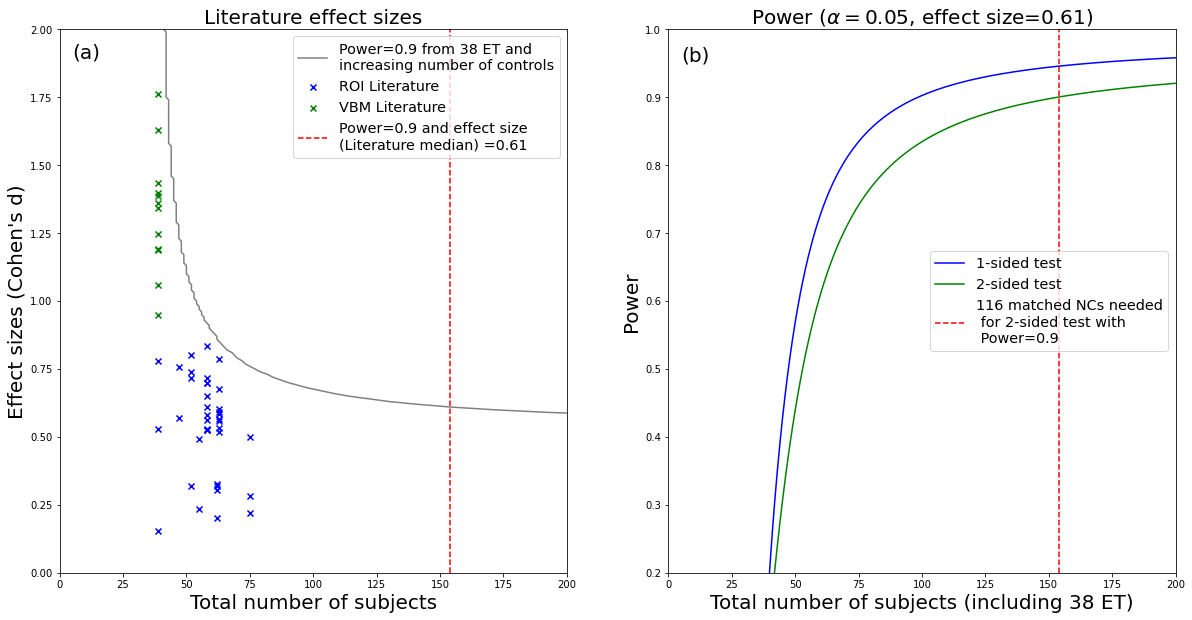

In [10]:
# Visualizae the literature effect size VS sample size, calculate the power .9 line for our dataset with fixed 38 ETs and augmented NCs. 
cohend_lit  = array(array(range(54, 400))/100)
n_et=38; 
alpha_expected=0.05; 
power_expected=0.9; 

r_d_expected_list=[ power.tt_ind_solve_power(effect_size=x, nobs1=n_et, alpha=alpha_expected, power=power_expected, ratio=None) for x in cohend_lit];
r_d_expected=power.tt_ind_solve_power(effect_size=es_lit, nobs1=n_et, alpha=alpha_expected, power=power_expected, ratio=None)
n_nc_needed = [math.ceil(x*n_et) for x in r_d_expected_list]
n_total = [x+n_et for x in n_nc_needed]

#Power achieved with Number of borrowed subjects 
n_matched=array(array(range(1,300))); n_total_power=[x+n_et for x in n_matched]
power_matched_1side=[ power.tt_ind_solve_power(effect_size=es_lit, nobs1=n_et, alpha=alpha_expected, ratio=x/n_et, alternative='larger') for x in n_matched];
power_matched_2side=[ power.tt_ind_solve_power(effect_size=es_lit, nobs1=n_et, alpha=alpha_expected, ratio=x/n_et) for x in n_matched];


# subplot1: literature effect sizes
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(n_total, cohend_lit, 'gray')
ax[0].scatter(pd_roi_lit['total n'], pd_roi_lit['Cohen d'], c='b', marker='x')
ax[0].scatter(pd_vbm_lit['total n'], pd_vbm_lit['Cohen d'], c='g', marker='x')
# print and plot the literature effect size 
r_d_lit=power.tt_ind_solve_power(effect_size=es_lit, nobs1=n_et, alpha=alpha_expected, power=power_expected, ratio=None)
n_total_aug=math.ceil((r_d_lit+1)*n_et)
print("literature median effect size: ", es_lit, ', the total number of samples needed: ',n_total_aug)
ax[0].vlines(n_total_aug, ymin=0, ymax=2, colors='r', linestyles='--', label='power=0.9')
# costumize
ax[0].set_xlim([0, 200]); ax[0].set_ylim([0, 2]);
ax[0].set_ylabel('Effect sizes (Cohen\'s d)',fontsize=20)
ax[0].set_xlabel('Total number of subjects',fontsize=20)
ax[0].set_title(r'Literature effect sizes',fontsize=20)
ax[0].legend(['Power='+str(power_expected)+' from '+str(n_et)+' ET and \nincreasing number of controls','ROI Literature','VBM Literature', 'Power=0.9 and effect size\n(Literature median) ='+str(es_lit)], loc='upper right',fontsize='x-large')
ax[0].text(0.025*200, 0.975*2, '(a)', fontsize=20, verticalalignment='top')
# subplot2: power with increasing NC subjcts
POW_LIM=[0.2, 1.0]
ax[1].plot(n_total_power, power_matched_1side, 'b')
ax[1].plot(n_total_power, power_matched_2side, 'g')

r_9=power.tt_ind_solve_power(effect_size=es_lit, nobs1=n_et, alpha=alpha_expected, ratio=None, power=0.9)
n_nc_needed=math.ceil(r_9*n_et)
ax[1].vlines(n_total_aug, ymin=POW_LIM[0], ymax=POW_LIM[1], colors='r', linestyles='--', label='power=0.9')
ax[1].set_xlim([0, 200]); ax[1].set_ylim(POW_LIM);
ax[1].set_xlabel('Total number of subjects (including 38 ET)',fontsize=20)
ax[1].set_ylabel('Power', fontsize=20)
ax[1].set_title(r'Power ($\alpha=0.05$, effect size='+str(es_lit)+')',fontsize=20)
ax[1].legend(['1-sided test','2-sided test', str(n_nc_needed)+' matched NCs needed\n for 2-sided test with\n Power='+str(power_expected)], loc='right',fontsize='x-large')
ax[1].text(0.025*200, 0.975*1, '(b)', fontsize=20, verticalalignment='top')
fig.savefig("power_analysis.jpg",dpi=300)

### 8. [Mavroudis, I., Petrides, F., Karantali, E., Chatzikonstantinou, S., McKenna, J., Ciobica, A., Iordache, A.-C., Dobrin, R., Trus, C., & Kazis, D. (2021). A Voxel-Wise Meta-Analysis on the Cerebellum in Essential Tremor. Medicina, 57(3), 264.](https://www.mdpi.com/1648-9144/57/3/264)
The power of studies mentioned in Mavroudis's meta analysis paper.

Study type: meta analysis.


In [11]:
# New meta analysis added.
sample_et = [36, 9, 45, 17, 47, 27, 14, 32, 19, 19, 20, 14, 25, 50, 19, 10]
sample_nc = [30, 9, 39, 17, 36, 27, 20, 12, 18, 20, 17, 23, 25, 32, 19, 12]
# Fang paper is not included for it is a rs-fMRI.
import numpy as np
n_et=np. median(sample_et)
n_nc=np. median(sample_nc)
print('Medians of sample sizes of the mentioned studies (ET/NC): ', np. median(sample_et), '/',np. median(sample_nc))

from statsmodels.stats import power
import math
from numpy import array
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# statsitical pre defined values: setting es=0.8
effect_size_expected=0.61; 
alpha_expected=0.05; 
power_expected=0.9;

# should pay attetnion to 1 sided or 2 sided tests
print('Medians of power of the mentioned studies (ET|NC): ', power.tt_ind_solve_power(effect_size=effect_size_expected, alpha=alpha_expected, nobs1=n_et, ratio=n_nc/n_et),
      '|', power.tt_ind_solve_power(effect_size=effect_size_expected, alpha=alpha_expected/10, nobs1=n_et, ratio=n_nc/n_et))

pow_a=[]; pow_a_10=[]
for i in range(len(sample_et)):
    pow_a.append(power.tt_ind_solve_power(effect_size=effect_size_expected, alpha=alpha_expected, nobs1=sample_et[i], ratio=sample_nc[i]/sample_et[i]))
    pow_a_10.append(power.tt_ind_solve_power(effect_size=effect_size_expected, alpha=alpha_expected/10, nobs1=sample_et[i], ratio=sample_nc[i]/sample_et[i]))
#print([round(x, 4) for x in pow_a], '\n' , [round(x,4) for x in pow_a_10]) 
print('Medians of power of the mentioned studies (a=0.05|a=0.05/10): ', round(np.median(pow_a),4), '|', round(np.median(pow_a_10),4))


Medians of sample sizes of the mentioned studies (ET/NC):  19.5 / 20.0
Medians of power of the mentioned studies (ET|NC):  0.46326431197568274 | 0.16121330251669092
Medians of power of the mentioned studies (a=0.05|a=0.05/10):  0.4432 | 0.1488
